## Loan Delinquency Prediction Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous jabardhasth increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions. Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)

In [2]:
import pandas as pd

In [1]:
df = pd.read_csv("Data (1).csv")
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [3]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [4]:
df.m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [5]:
df.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [6]:
df.source.value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [8]:
df.shape

(116058, 29)

In [9]:
df.isnull().any()

loan_id                     False
source                      False
financial_institution       False
interest_rate               False
unpaid_principal_bal        False
loan_term                   False
origination_date            False
first_payment_date          False
loan_to_value               False
number_of_borrowers         False
debt_to_income_ratio        False
borrower_credit_score       False
loan_purpose                False
insurance_percent           False
co-borrower_credit_score    False
insurance_type              False
m1                          False
m2                          False
m3                          False
m4                          False
m5                          False
m6                          False
m7                          False
m8                          False
m9                          False
m10                         False
m11                         False
m12                         False
m13                         False
dtype: bool

In [10]:
df.financial_institution.unique()

array(['Turner, Baldwin and Rhodes', 'Swanson, Newton and Miller',
       'Thornton-Davis', 'OTHER', 'Browning-Hart', 'Richardson Ltd',
       'Edwards-Hoffman', 'Richards-Walters', 'Martinez, Duffy and Bird',
       'Miller, Mcclure and Allen', 'Anderson-Taylor',
       'Taylor, Hunt and Rodriguez', 'Nicholson Group',
       'Cole, Brooks and Vincent', 'Sanchez, Hays and Wilkerson',
       'Sanchez-Robinson', 'Suarez Inc', 'Romero, Woods and Johnson',
       'Chapman-Mcmahon'], dtype=object)

# EDA

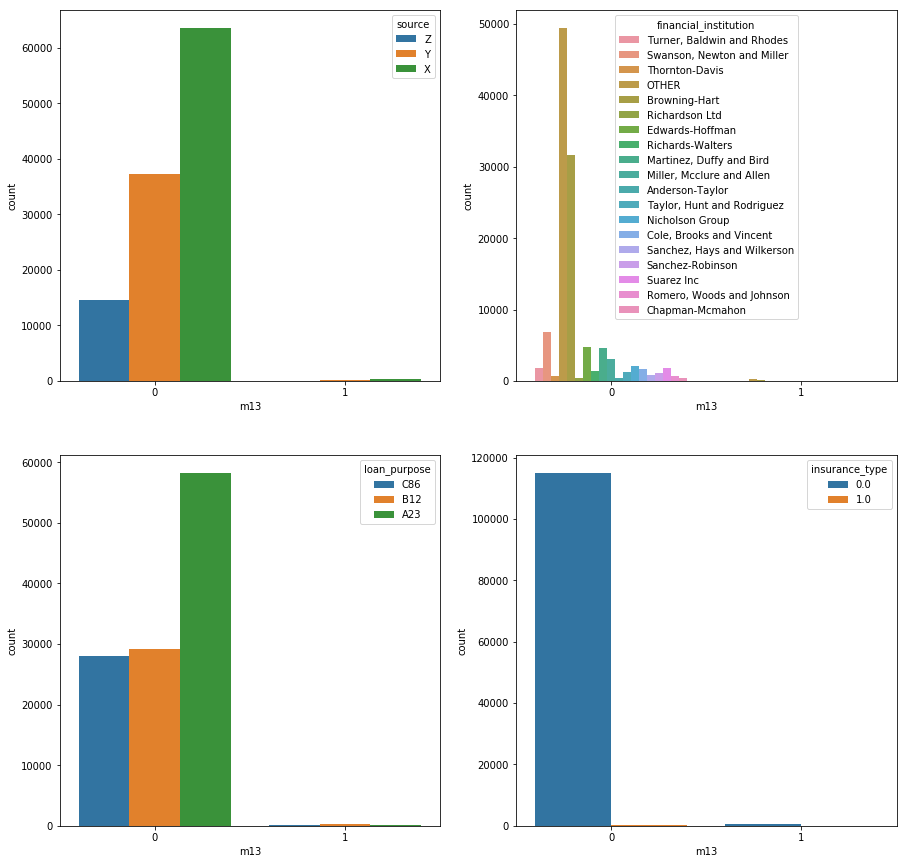

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 15)
sns.countplot(df["m13"],data=df,hue="source",ax=axes[0][0])
sns.countplot(df["m13"],data=df,hue="financial_institution",ax=axes[0][1])
sns.countplot(df["m13"],data=df,hue="loan_purpose",ax=axes[1][0])
sns.countplot(df["m13"],data=df,hue="insurance_type",ax=axes[1][1])

In [12]:
pd.crosstab(df['m13'],df['source'])#.plot(kind='bar')

source,X,Y,Z
m13,,,
0,63553,37307,14562
1,305,247,84


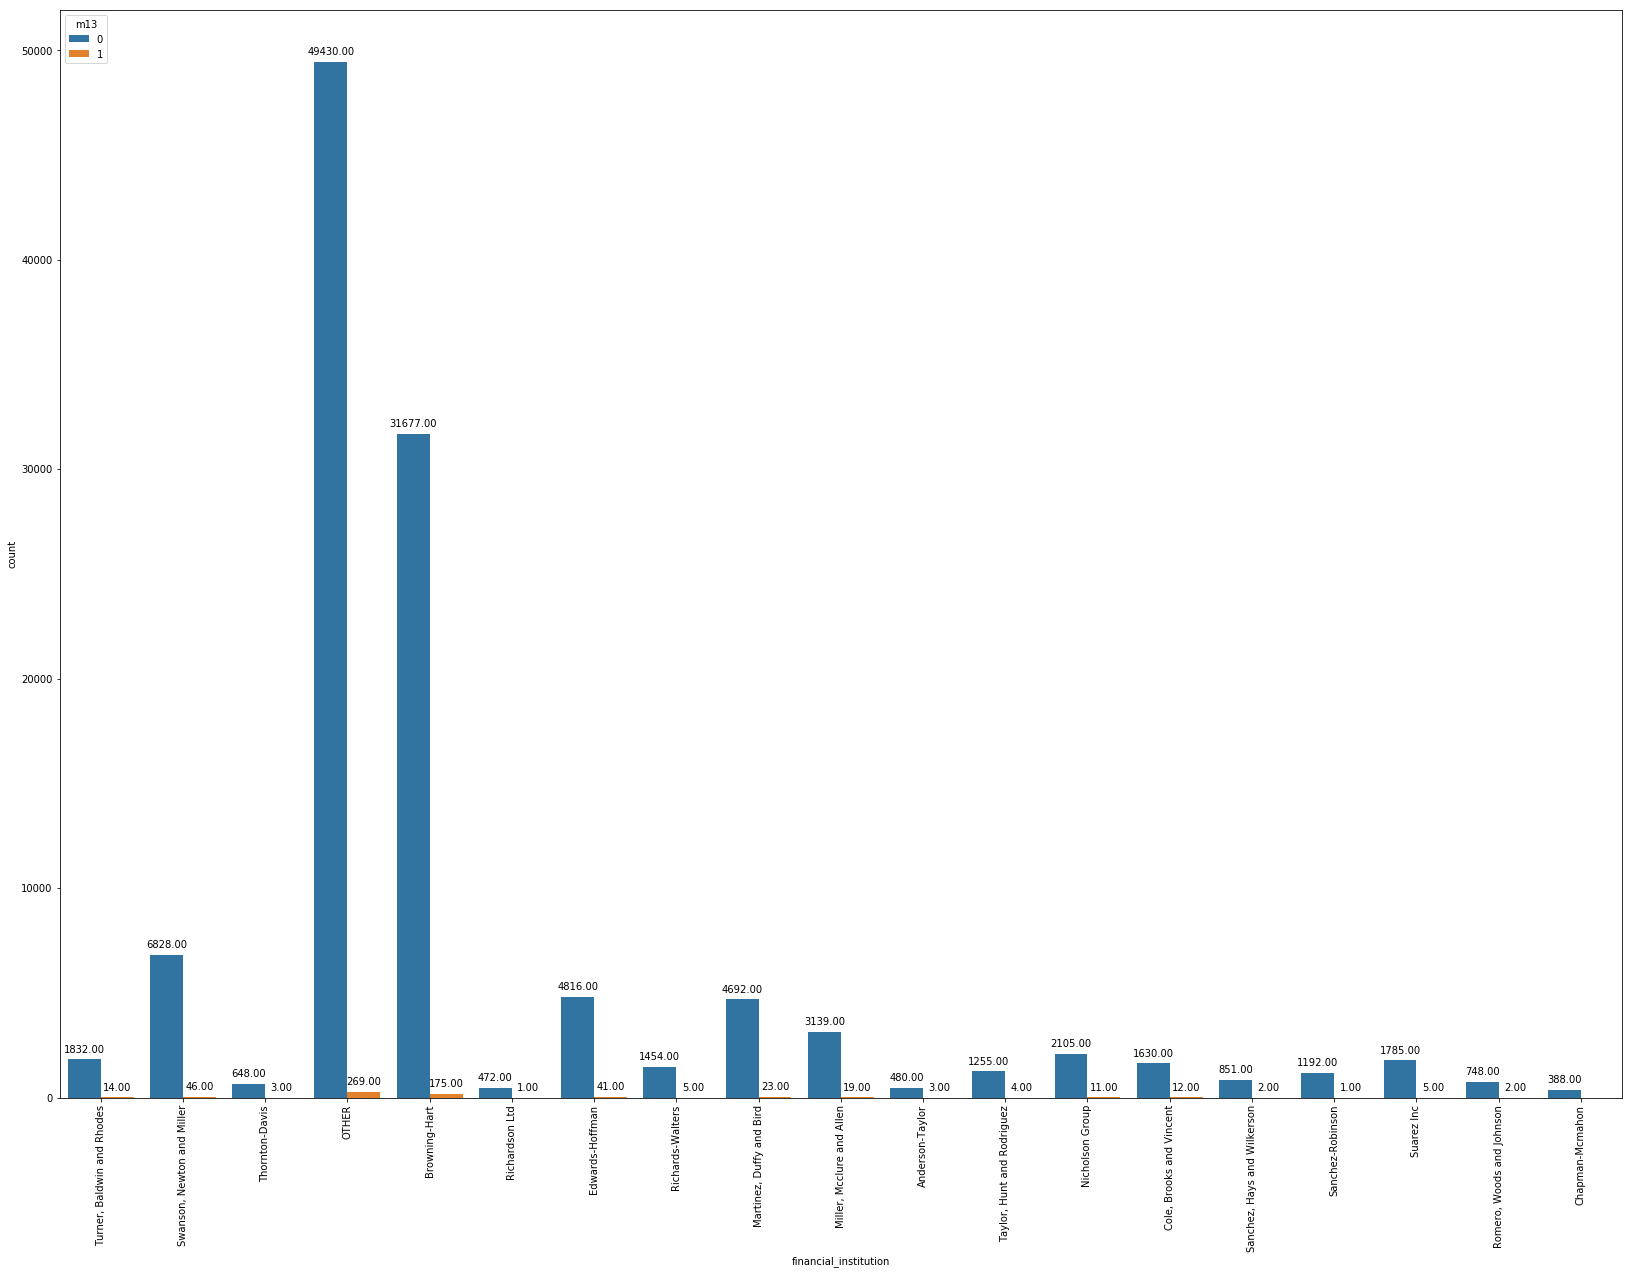

In [13]:
plt.figure(figsize=(28, 20))
plt.xticks(rotation =90)
splot = sns.countplot(data=df, hue = 'm13', x = 'financial_institution')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')   

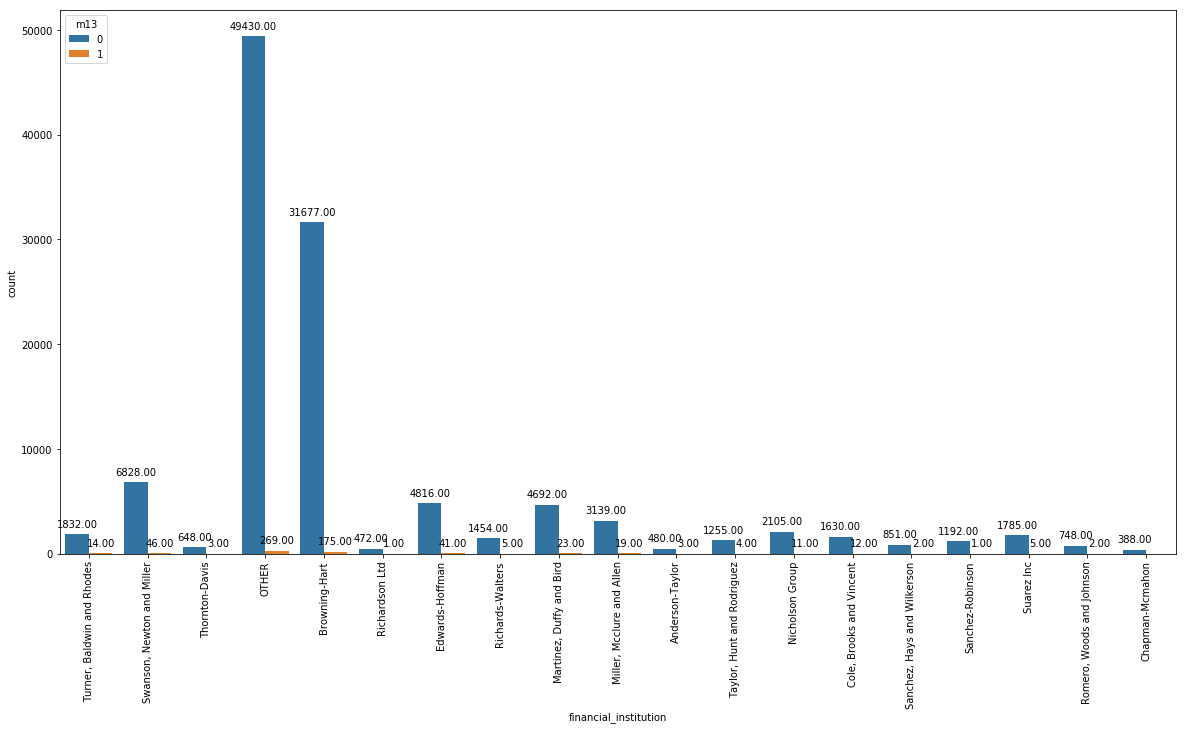

In [14]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation =90)
splot = sns.countplot(data=df, hue = 'm13', x = 'financial_institution')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')   

In [15]:
pd.crosstab(df['m13'],df['financial_institution'])

financial_institution,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes"
m13,,,,,,,,,,,,,,,,,,,
0,480,31677,388,1630,4816,4692,3139,2105,49430,1454,472,748,851,1192,1785,6828,1255,648,1832
1,3,175,0,12,41,23,19,11,269,5,1,2,2,1,5,46,4,3,14


In [16]:
pd.crosstab(df['m13'],df['number_of_borrowers'])

number_of_borrowers,1.0,2.0
m13,,
0,46787,68635
1,427,209


In [17]:
pd.crosstab(df['m13'],df['loan_purpose'])

loan_purpose,A23,B12,C86
m13,,,
0,58251,29164,28007
1,211,219,206


In [18]:
df.insurance_type.value_counts()

0.0    115680
1.0       378
Name: insurance_type, dtype: int64

In [19]:
pd.crosstab(df['m13'],df['insurance_type'])

insurance_type,0.0,1.0
m13,,
0,115049,373
1,631,5


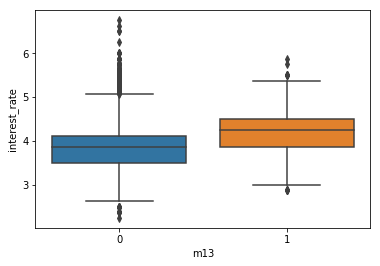

In [20]:
sns.boxplot(df['m13'],df['interest_rate'])

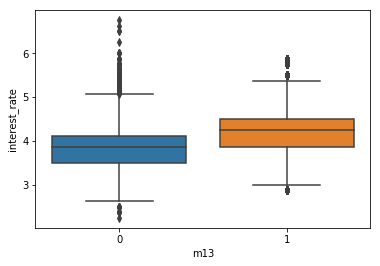

In [145]:
sns.boxplot(df_upsampled['m13'],df_upsampled['interest_rate'])

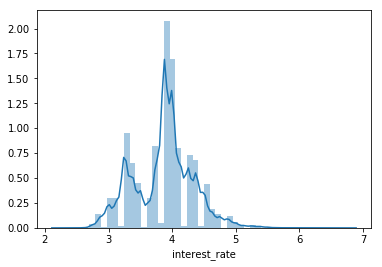

In [21]:
sns.distplot(df['interest_rate'])

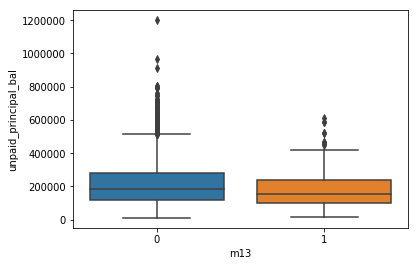

In [22]:
sns.boxplot(df['m13'],df['unpaid_principal_bal'])

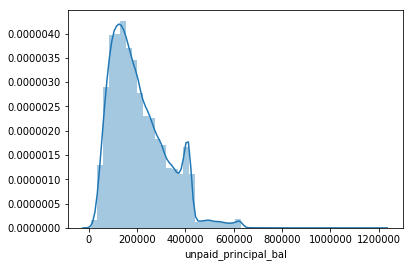

In [23]:
sns.distplot(df['unpaid_principal_bal'])

In [24]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

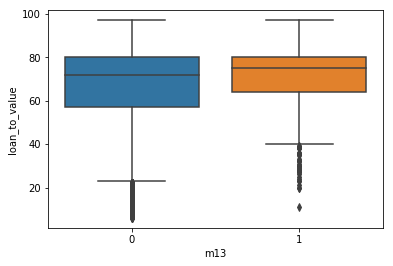

In [25]:
sns.boxplot(df['m13'],df['loan_to_value'])

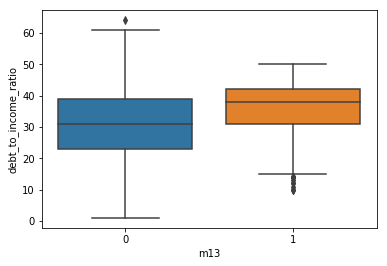

In [26]:
sns.boxplot(df['m13'],df['debt_to_income_ratio'])

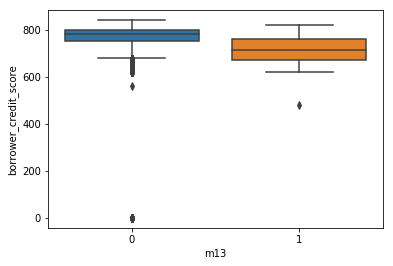

In [27]:
sns.boxplot(df['m13'],df['borrower_credit_score'])

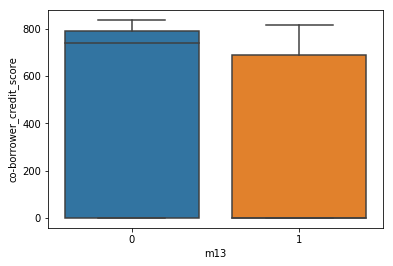

In [28]:
sns.boxplot(df['m13'],df['co-borrower_credit_score'])

In [29]:
pd.crosstab(df['m13'],df['insurance_percent'])

insurance_percent,0.0,6.0,12.0,15.0,16.0,17.0,18.0,20.0,22.0,25.0,30.0,35.0,39.0,40.0
m13,,,,,,,,,,,,,,
0,101909,695,2479,1,18,2,12,3,1,4855,5076,369,1,1
1,546,6,14,0,0,0,0,0,0,30,37,3,0,0


In [30]:
df.insurance_percent.value_counts()

0.0     102455
30.0      5113
25.0      4885
12.0      2493
6.0        701
35.0       372
16.0        18
18.0        12
20.0         3
17.0         2
15.0         1
39.0         1
22.0         1
40.0         1
Name: insurance_percent, dtype: int64

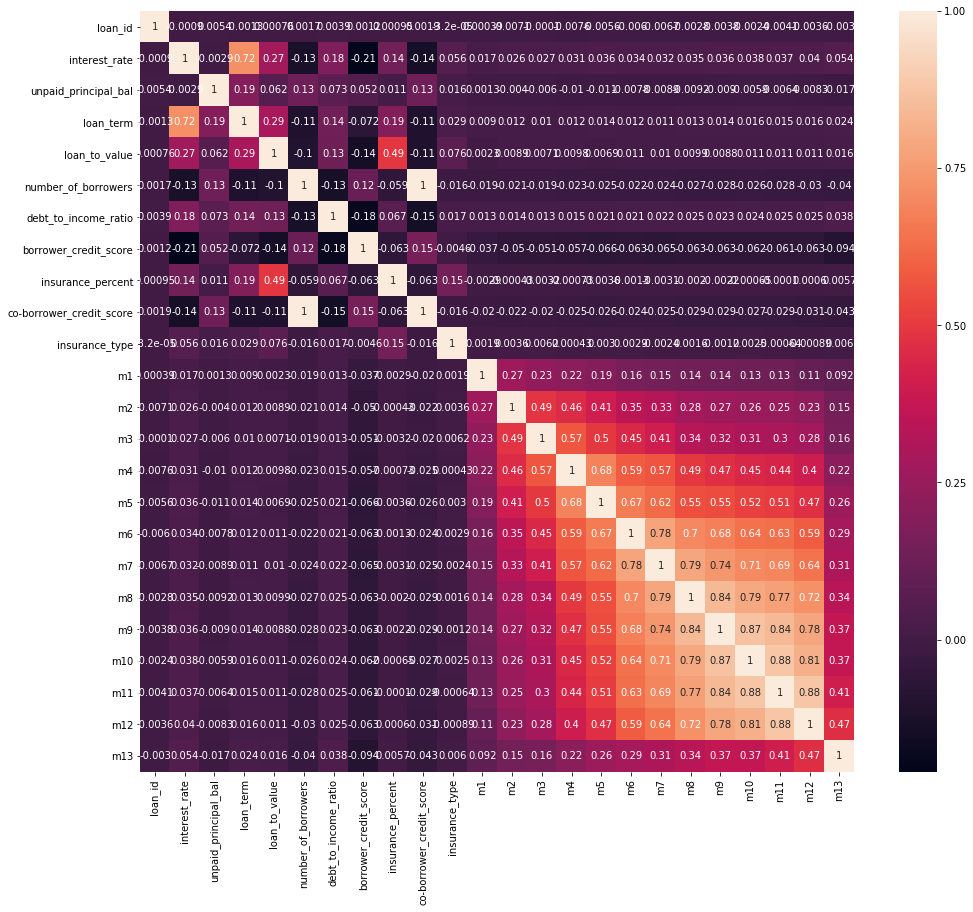

In [31]:
plt.figure(figsize=(16,14))
cor = df.corr()
sns.heatmap(cor,annot=True)

loan_term  Distribution Plot


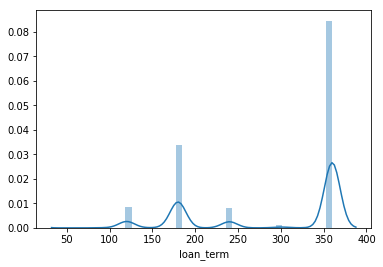

loan_to_value  Distribution Plot


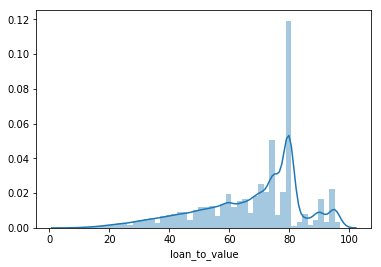

debt_to_income_ratio  Distribution Plot


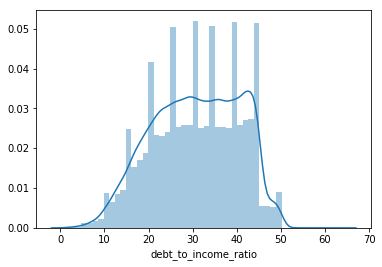

borrower_credit_score  Distribution Plot


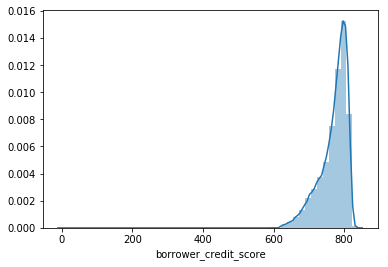

insurance_percent  Distribution Plot


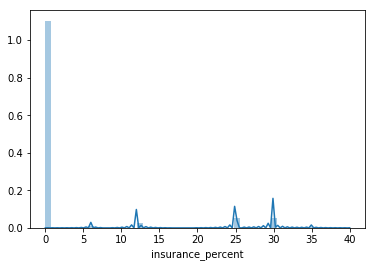

co-borrower_credit_score  Distribution Plot


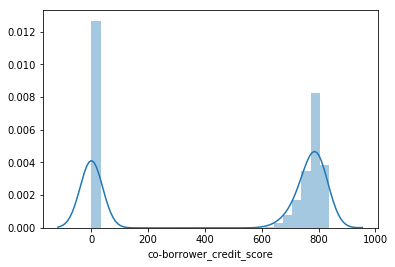

unpaid_principal_bal  Distribution Plot


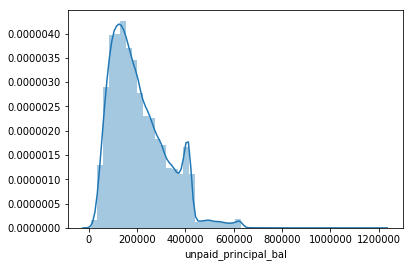

interest_rate  Distribution Plot


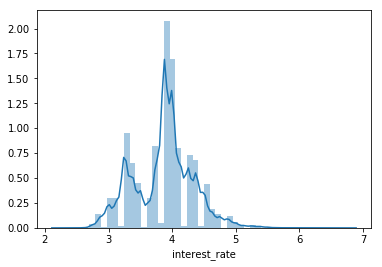

In [32]:
for cols in df[['loan_term','loan_to_value','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','unpaid_principal_bal',
               'interest_rate']]:
    sns.distplot(df[cols])
    print(cols,' Distribution Plot')
    plt.show()

In [33]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

loan_term  Distribution Plot


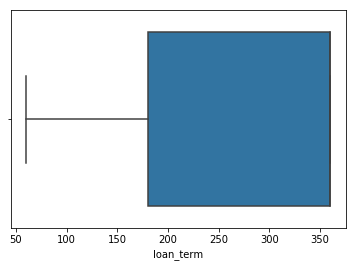

loan_to_value  Distribution Plot


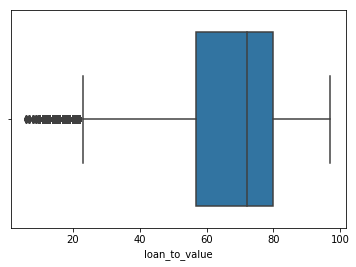

debt_to_income_ratio  Distribution Plot


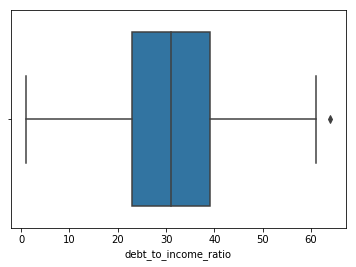

borrower_credit_score  Distribution Plot


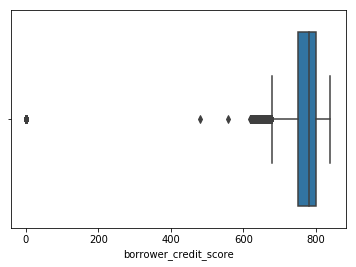

insurance_percent  Distribution Plot


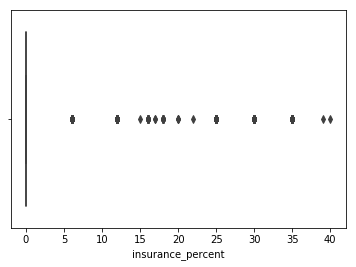

co-borrower_credit_score  Distribution Plot


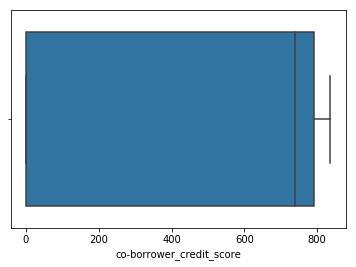

unpaid_principal_bal  Distribution Plot


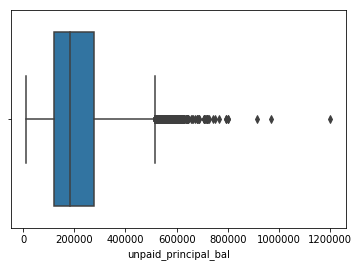

interest_rate  Distribution Plot


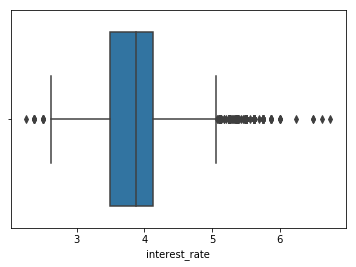

In [34]:
for cols in df[['loan_term','loan_to_value','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','unpaid_principal_bal',
               'interest_rate']]:
    sns.boxplot(df[cols])
    print(cols,' Distribution Plot')
    plt.show()

In [35]:
df1 = df.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','loan_purpose'],axis=1)


from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
x_std = sc.fit_transform(df1)

In [36]:
df.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


# Stastical Inference

In [37]:
X=df.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','loan_purpose','m13'],axis=1)
y=df['m13'].values

import statsmodels.api as sm


x_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

C:\Users\Samsung\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     1554.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:52:01   Log-Likelihood:             1.5276e+05
No. Observations:              116058   AIC:                        -3.055e+05
Df Residuals:                  116035   BIC:                        -3.053e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0674      0.008      8.528      0.000       0.052       0.083
interest_rate                0.0041      0.001      6.517      0.000       0.003       0.005
unpaid_principal_bal     -4.836e-09   1.76e-09     -2.748      0.006   -8.28e-09   -1.39e-09
loan_term                 -5.98e-06   3.26e-06     -1.834      0.067   -1.24e-05    4.12e-07
loan_to_value            -1.646e-05   1.32e-05     -1.248      0.212   -4.23e-05    9.38e-06
number_of_borrowers         -0.0039      0.005     -0.773      0.440      -0.014       0.006
debt_to_income_ratio      8.793e-05   2.04e-05      4.306      0.000    4.79e-05       0.000
borrower_credit_score     -9.52e-05   5.14e-06    -18.533      0.000      -0.000   -8.51e-05
insurance_percent        -3.224e-06   2.73e-05     -0.118      0.906   -5.67e-05    5.03e-05
co-borrower_credit_score  2.399e-06   6.58e-06      0.364      0.716   -1.05e-05    1.53e-05
insurance_type               0.0065      0.003      1.931      0.054   -9.96e-05       0.013
m1                           0.0333      0.003     10.576      0.000       0.027       0.040
m2                           0.0377      0.004      8.445      0.000       0.029       0.046
m3                          -0.0085      0.004     -1.889      0.059      -0.017       0.000
m4                           0.0082      0.005      1.739      0.082      -0.001       0.017
m5                           0.0396      0.004     10.916      0.000       0.032       0.047
m6                          -0.0062      0.004     -1.607      0.108      -0.014       0.001
m7                          -0.0041      0.004     -1.099      0.272      -0.011       0.003
m8                          -0.0065      0.004     -1.814      0.070      -0.013       0.001
m9                           0.0186      0.004      5.093      0.000       0.011       0.026
m10                         -0.0422      0.003    -13.301      0.000      -0.048      -0.036
m11                          0.0107      0.003      3.422      0.001       0.005       0.017
m12                          0.1942      0.002     84.735      0.000       0.190       0.199
==============================================================================
Omnibus:                   201755.089   Durbin-Watson:                   0.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        200381186.597
Skew:                          12.429   Prob(JB):                         0.00
Kurtosis:                     205.039   Cond. No.                     1.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+07. This might indicate that there are
strong m

In [43]:
print(df.m13.value_counts()/len(df)*100)

0    99.451998
1     0.548002
Name: m13, dtype: float64


# Handling Imbalanced Dataset

In [44]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 115422), (1, 115422)]


In [45]:
df1.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [46]:
X=df1.drop(['m13','number_of_borrowers'],axis=1)
y=df1['m13'].values

import statsmodels.api as sm


x_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

C:\Users\Samsung\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     1628.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:             1.5276e+05
No. Observations:              116058   AIC:                        -3.055e+05
Df Residuals:                  116036   BIC:                        -3.053e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0625      0.005     13.565      0.000       0.053       0.072
interest_rate                0.0041      0.001      6.491      0.000       0.003       0.005
unpaid_principal_bal     -4.827e-09   1.76e-09     -2.743      0.006   -8.28e-09   -1.38e-09
loan_term                -5.891e-06   3.26e-06     -1.808      0.071   -1.23e-05    4.96e-07
loan_to_value            -1.684e-05   1.32e-05     -1.278      0.201   -4.27e-05    8.98e-06
debt_to_income_ratio      8.704e-05   2.04e-05      4.269      0.000    4.71e-05       0.000
borrower_credit_score    -9.372e-05   4.77e-06    -19.655      0.000      -0.000   -8.44e-05
insurance_percent        -3.402e-06   2.73e-05     -0.125      0.901   -5.69e-05    5.01e-05
co-borrower_credit_score -2.674e-06   5.18e-07     -5.163      0.000   -3.69e-06   -1.66e-06
insurance_type               0.0065      0.003      1.935      0.053   -8.62e-05       0.013
m1                           0.0333      0.003     10.576      0.000       0.027       0.040
m2                           0.0377      0.004      8.446      0.000       0.029       0.046
m3                          -0.0085      0.004     -1.887      0.059      -0.017       0.000
m4                           0.0082      0.005      1.742      0.082      -0.001       0.017
m5                           0.0396      0.004     10.916      0.000       0.032       0.047
m6                          -0.0062      0.004     -1.610      0.107      -0.014       0.001
m7                          -0.0041      0.004     -1.102      0.270      -0.011       0.003
m8                          -0.0064      0.004     -1.811      0.070      -0.013       0.001
m9                           0.0186      0.004      5.097      0.000       0.011       0.026
m10                         -0.0422      0.003    -13.304      0.000      -0.048      -0.036
m11                          0.0107      0.003      3.420      0.001       0.005       0.017
m12                          0.1942      0.002     84.742      0.000       0.190       0.199
==============================================================================
Omnibus:                   201755.119   Durbin-Watson:                   0.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        200386372.253
Skew:                          12.429   Prob(JB):                         0.00
Kurtosis:                     205.041   Cond. No.                     6.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
df1.m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

# Feature Selection

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = [variance_inflation_factor(x_constant.values,i)
      for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns) 

,vif
interest_rate,2.332701
unpaid_principal_bal,1.122534
loan_term,2.358793
loan_to_value,1.430308
debt_to_income_ratio,1.084978
borrower_credit_score,1.116651
insurance_percent,1.347051
co-borrower_credit_score,1.078406
insurance_type,1.025373
m1,1.099250


In [49]:
df['m1'].value_counts()

0    115729
1       293
2        30
3         6
Name: m1, dtype: int64

# Feature Engineering

In [50]:
df.drop(df[df['m1'] > 1].index, inplace = True)

In [51]:
df['No of deliquent months max'] = df[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']].max(axis=1)

In [52]:
df['Credit Score-Max'] = df[['borrower_credit_score','co-borrower_credit_score']].max(axis=1)

In [53]:
df['Debt to income.BINS']=pd.cut(df['debt_to_income_ratio'],3,labels=['Low','Medium','High']).astype(np.object)

In [78]:
df[['borrower_credit_score','co-borrower_credit_score','Credit Score-Max']].corr()

,borrower_credit_score
borrower_credit_score,1.0


In [54]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m7,m8,m9,m10,m11,m12,m13,No of deliquent months max,Credit Score-Max,Debt to income.BINS
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,1,0,0,0,0,0,1,1,694.0,Low
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,1,0,1,1,697.0,High
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,1,0,780.0,Medium
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,1,1,1,1,1,1,638.0,High
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,6,7,8,9,10,11,1,11,681.0,Medium


# Label Encoding

In [55]:
df[['origination_date','first_payment_date']]=df[['origination_date','first_payment_date']].astype('category')
df[['loan_purpose']] = df[['loan_purpose']] .astype('category')
df[['No of deliquent months max','Credit Score-Max','Debt to income.BINS']] = df[['No of deliquent months max','Credit Score-Max','Debt to income.BINS']].astype('category')

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df.select_dtypes(include=['category'])

In [57]:
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,origination_date,first_payment_date,loan_purpose,No of deliquent months max,Credit Score-Max,Debt to income.BINS
0,2,3,2,1,78,1
1,0,1,1,1,81,0
2,0,1,1,0,164,2
3,1,2,1,1,22,0
4,1,2,2,11,65,2


In [58]:
# concat df_categorical with original df
df1 = df.drop(df_categorical.columns, axis=1)
df1 = pd.concat([df1, df_categorical], axis=1)
df1.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,m10,m11,m12,m13,origination_date,first_payment_date,loan_purpose,No of deliquent months max,Credit Score-Max,Debt to income.BINS
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,694.0,...,0,0,0,1,2,3,2,1,78,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,697.0,...,0,1,0,1,0,1,1,1,81,0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,49,1.0,33.0,780.0,...,0,0,0,1,0,1,1,0,164,2
3,601385667462,X,OTHER,4.750,135000,360,46,2.0,44.0,633.0,...,1,1,1,1,1,2,1,1,22,0
4,273870029961,X,OTHER,4.750,124000,360,80,1.0,43.0,681.0,...,9,10,11,1,1,2,2,11,65,2


loan_term  Distribution Plot


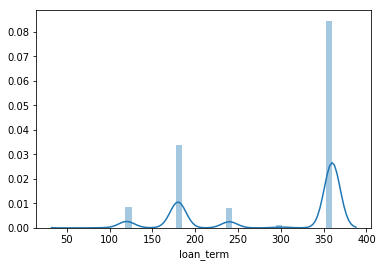

loan_to_value  Distribution Plot


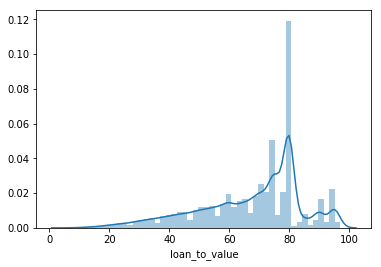

debt_to_income_ratio  Distribution Plot


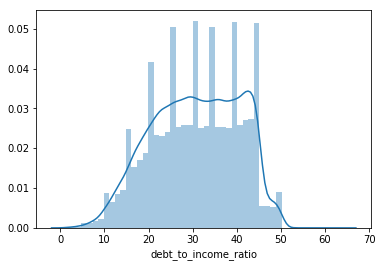

borrower_credit_score  Distribution Plot


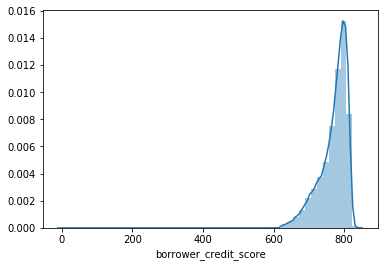

insurance_percent  Distribution Plot


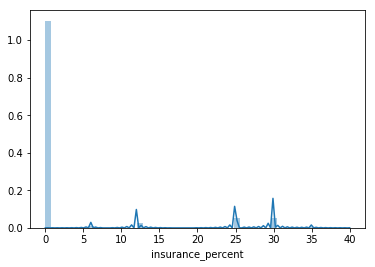

co-borrower_credit_score  Distribution Plot


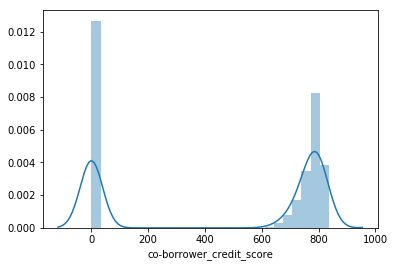

unpaid_principal_bal  Distribution Plot


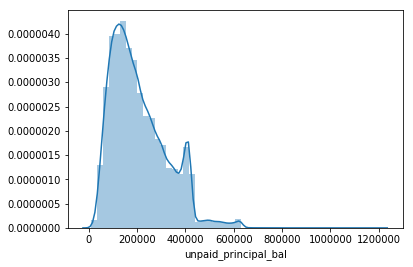

interest_rate  Distribution Plot


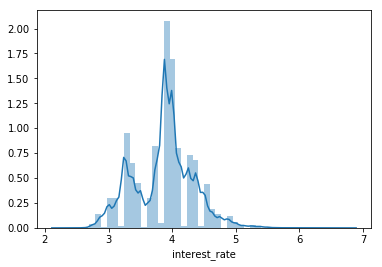

In [59]:
for cols in df1[['loan_term','loan_to_value','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','unpaid_principal_bal',
               'interest_rate']]:
    sns.distplot(df1[cols])
    print(cols,' Distribution Plot')
    plt.show()

In [60]:
df1.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'origination_date', 'first_payment_date', 'loan_purpose',
       'No of deliquent months max', 'Credit Score-Max',
       'Debt to income.BINS'],
      dtype='object')

In [61]:
df_new = df1.drop(['loan_id','source','financial_institution'],axis=1)
df_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m10,m11,m12,m13,origination_date,first_payment_date,loan_purpose,No of deliquent months max,Credit Score-Max,Debt to income.BINS
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,1,2,3,2,1,78,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,1,0,1,0,1,1,1,81,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,1,0,1,1,0,164,2
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,1,1,1,1,1,2,1,1,22,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,9,10,11,1,1,2,2,11,65,2


In [62]:
df_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m10,m11,m12,m13,origination_date,first_payment_date,loan_purpose,No of deliquent months max,Credit Score-Max,Debt to income.BINS
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,1,2,3,2,1,78,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,1,0,1,0,1,1,1,81,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,1,0,1,1,0,164,2
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,1,1,1,1,1,2,1,1,22,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,9,10,11,1,1,2,2,11,65,2


In [63]:
X = df_new.drop(['m13'],axis=1)
y = df_new['m13']

In [64]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_new[df_new.m13==0]
df_minority = df_new[df_new.m13==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=69234,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.m13.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int6

0    115390
1     69234
Name: m13, dtype: int64

In [65]:
import warnings
warnings.filterwarnings('ignore') 

In [66]:
df_upsampled.m13.value_counts()

0    115390
1     69234
Name: m13, dtype: int64

In [67]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

y = df_upsampled.m13
X = df_upsampled.drop('m13', axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [68]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [72]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('Gradient',GradientBoostingClassifier()))
models.append(('Bagging',BaggingClassifier()))

#models.append(('SVM',SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.768021 (0.005438)
KNN: 0.986312 (0.000654)
Decision Tree: 0.996510 (0.000628)
RandomForest: 0.999249 (0.000219)
Naive Bayes: 0.783164 (0.003659)
Adaboost: 0.856580 (0.002880)
Gradient: 0.874702 (0.001560)
Bagging: 0.998599 (0.000301)


In [80]:
Model = ['LogisticRegression','KNeighborsClassifier','Naive Bayes','DecisionTreeClassifier','RandomForest','AdaBoost',
         'GradientBoost','Bagging']
Scores = [0.7771195,0.985325,0.788988,0.996500,0.999175,0.871343,0.886967,0.998630]

evaluation = pd.DataFrame({'Model': Model,
                           'Scores'   :  Scores,
                          })
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,Scores
0,LogisticRegression,0.777119
1,KNeighborsClassifier,0.985325
2,Naive Bayes,0.788988
3,DecisionTreeClassifier,0.996500
4,RandomForest,0.999175
5,AdaBoost,0.871343
6,GradientBoost,0.886967
7,Bagging,0.998630


In [71]:
feature_rank = pd.DataFrame( { 'feature': X_train.columns, 'importance': radm_clf.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

NameError: name 'radm_clf' is not defined

# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)[:,1]
y_pred = knn.predict(X_test)  

0.9964898030228309


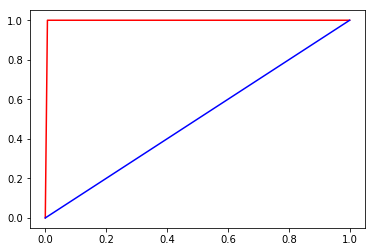

In [82]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [83]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34471
           1       0.97      1.00      0.98     20917

    accuracy                           0.99     55388
   macro avg       0.98      0.99      0.99     55388
weighted avg       0.99      0.99      0.99     55388



# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier 

rf= RandomForestClassifier( max_depth=10, n_estimators=10)
rf.fit(X_train,y_train) 
y_prob = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)  

In [92]:
X_train.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'origination_date', 'first_payment_date', 'loan_purpose',
       'No of deliquent months max', 'Credit Score-Max',
       'Debt to income.BINS'],
      dtype='object')

In [94]:
from sklearn.ensemble import RandomForestClassifier 

rf= RandomForestClassifier( max_depth=10, n_estimators=10)
rf.fit(X_train.drop('Credit Score-Max',axis=1),y_train) 
y_prob = rf.predict_proba(X_test.drop('Credit Score-Max',axis=1))[:,1]
y_pred = rf.predict(X_test.drop('Credit Score-Max',axis=1))  

No handles with labels found to put in legend.


0.9762399439556118


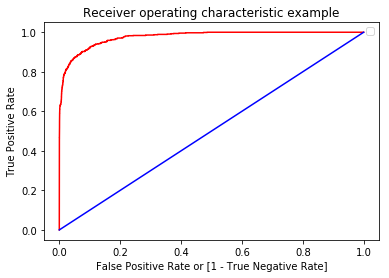

In [98]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve    #without max
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')   
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

No handles with labels found to put in legend.


0.9650440845028637


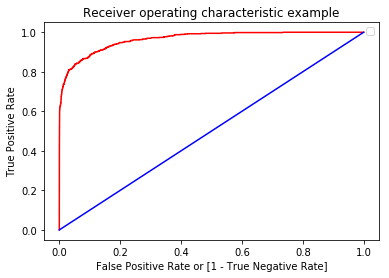

In [85]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve    
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')   
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

In [86]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     34471
           1       0.96      0.76      0.85     20917

    accuracy                           0.90     55388
   macro avg       0.92      0.87      0.88     55388
weighted avg       0.90      0.90      0.89     55388



In [96]:
from sklearn import metrics    #without max
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     34471
           1       0.97      0.76      0.85     20917

    accuracy                           0.90     55388
   macro avg       0.92      0.87      0.89     55388
weighted avg       0.91      0.90      0.90     55388



In [87]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

confusion_matrix(y_test, y_pred)

array([[33828,   643],
       [ 5064, 15853]], dtype=int64)

In [88]:
from sklearn import metrics 

def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    
    sns.heatmap(cm, annot=True,  fmt='.2f',  
                yticklabels = ["Deliquent", "Non Deliquent"], 
                xticklabels = ["Deliquent", "Non Deliquent"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

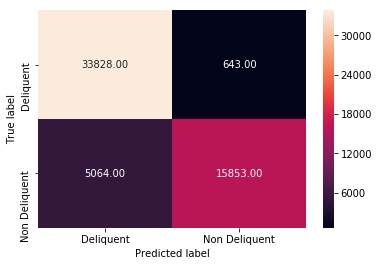

In [89]:
cm = draw_cm(y_test,y_pred)
cm 

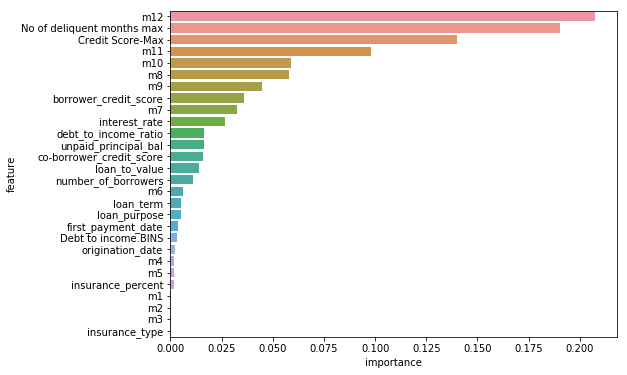

In [90]:
feature_rank = pd.DataFrame( { 'feature': X_train.columns, 'importance': rf.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

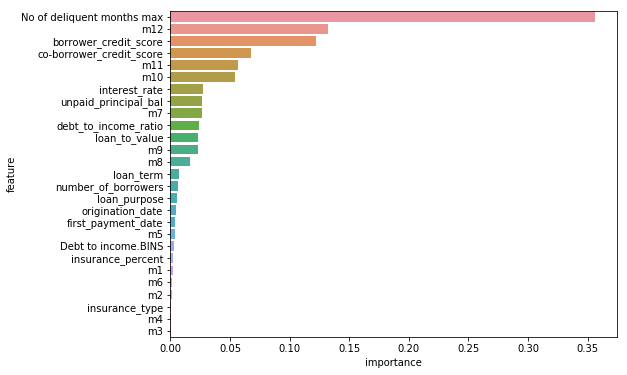

In [99]:
feature_rank = pd.DataFrame( { 'feature': X_train.drop('Credit Score-Max',axis=1).columns, 'importance': rf.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

#without max

In [91]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100 
feature_rank.head(10)

,feature,importance,cumsum
21,m12,0.207640,20.763962
25,No of deliquent months max,0.190205,39.784435
26,Credit Score-Max,0.140235,53.807968
20,m11,0.098129,63.620912
19,m10,0.059039,69.524851
17,m8,0.057844,75.309243
18,m9,0.044735,79.782698
6,borrower_credit_score,0.036063,83.388960
16,m7,0.032700,86.658995
0,interest_rate,0.026510,89.309970


# Decision Tree

In [104]:
model_DD = DecisionTreeClassifier()
model_DD.fit(X_train,y_train) 
y_prob = model_DD.predict_proba(X_test)[:,1]
y_pred = model_DD.predict(X_test)  

0.9979402976414958


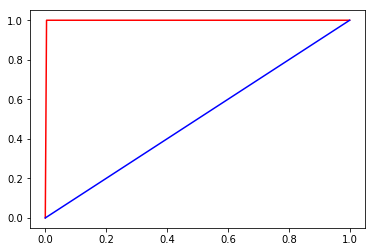

In [105]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [106]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34471
           1       0.99      1.00      1.00     20917

    accuracy                           1.00     55388
   macro avg       1.00      1.00      1.00     55388
weighted avg       1.00      1.00      1.00     55388



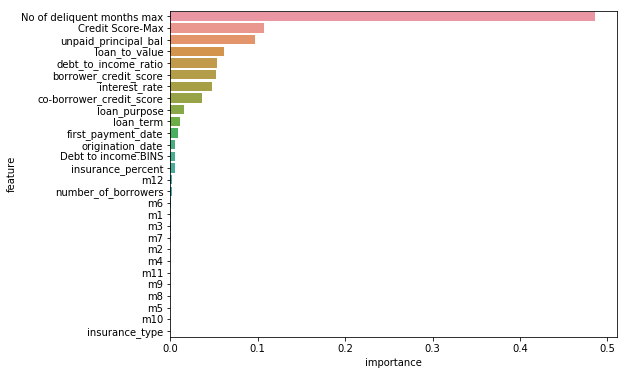

In [107]:
feature_rank = pd.DataFrame( { 'feature': X_train.columns, 'importance': model_DD.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [108]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100 
feature_rank.head(10)

,feature,importance,cumsum
25,No of deliquent months max,0.486327,48.632677
26,Credit Score-Max,0.106638,59.296502
1,unpaid_principal_bal,0.096410,68.937474
3,loan_to_value,0.061102,75.047697
5,debt_to_income_ratio,0.053136,80.361315
6,borrower_credit_score,0.052231,85.584458
0,interest_rate,0.047745,90.358986
8,co-borrower_credit_score,0.036314,93.990343
24,loan_purpose,0.015719,95.562292
2,loan_term,0.011180,96.680250


# Bagging

In [109]:
bg =BaggingClassifier()
bg.fit(X_train, y_train)
y_prob = bg.predict_proba(X_test)[:,1]
y_pred = bg.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
roc_auc_score(y_test, y_prob)

0.9999274752690668

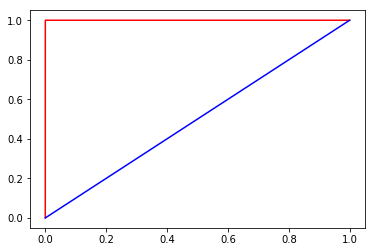

In [110]:
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [111]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34471
           1       1.00      1.00      1.00     20917

    accuracy                           1.00     55388
   macro avg       1.00      1.00      1.00     55388
weighted avg       1.00      1.00      1.00     55388



# Adaboost

0.9162533163828946


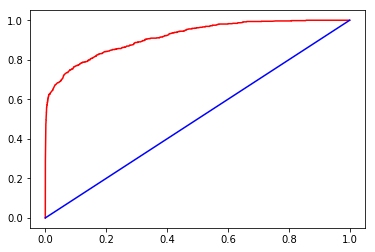

In [112]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

GS1= AdaBoostClassifier()
GS1.fit(X_train, y_train)
y_prob = GS1.predict_proba(X_test)[:,1]
y_pred = GS1.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [113]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     34471
           1       0.91      0.68      0.78     20917

    accuracy                           0.85     55388
   macro avg       0.87      0.82      0.84     55388
weighted avg       0.86      0.85      0.85     55388



In [114]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

confusion_matrix(y_test, y_pred)

array([[33047,  1424],
       [ 6608, 14309]], dtype=int64)

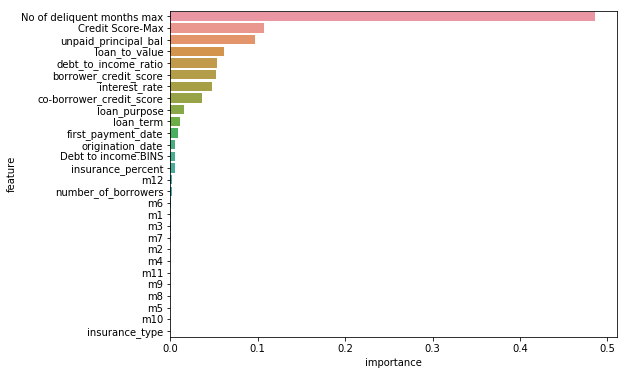

In [115]:
feature_rank = pd.DataFrame( { 'feature': X_train.columns, 'importance': model_DD.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

# Gradient Boost

0.9474114989796116


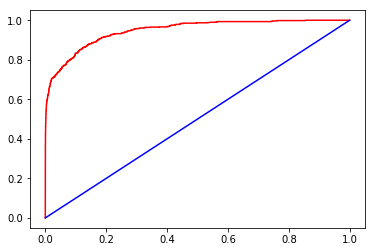

In [116]:
GS = GradientBoostingClassifier()
GS.fit(X_train, y_train)
y_prob = GS.predict_proba(X_test)[:,1]
y_pred = GS.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [117]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     34471
           1       0.93      0.72      0.81     20917

    accuracy                           0.87     55388
   macro avg       0.89      0.84      0.86     55388
weighted avg       0.88      0.87      0.87     55388



In [118]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

confusion_matrix(y_test, y_pred)

array([[33280,  1191],
       [ 5769, 15148]], dtype=int64)

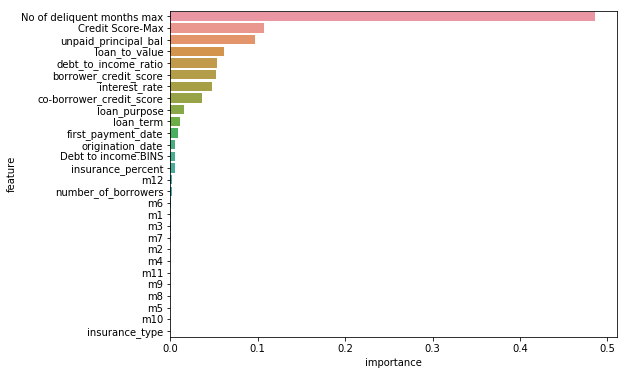

In [119]:
feature_rank = pd.DataFrame( { 'feature': X_train.columns, 'importance': model_DD.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

# LR 

In [120]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

y = df_upsampled.m13
X = df_upsampled.drop('m13', axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

0.813627836105833


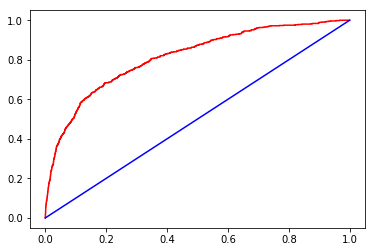

In [121]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)[:,1]
y_pred = lr.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [122]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     34471
           1       0.73      0.61      0.66     20917

    accuracy                           0.77     55388
   macro avg       0.76      0.74      0.74     55388
weighted avg       0.76      0.77      0.76     55388



In [123]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

confusion_matrix(y_test, y_pred)

array([[29874,  4597],
       [ 8239, 12678]], dtype=int64)

# Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_prob = model_naive.predict_proba(X_test)[:,1]
y_pred = model_naive.predict(X_test) 
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))

0.8345725096254571


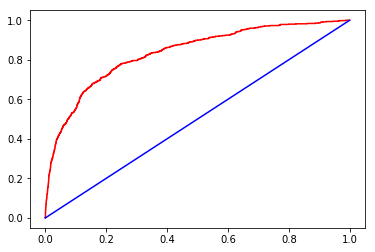

In [133]:
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [134]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84     34471
           1       0.76      0.62      0.68     20917

    accuracy                           0.78     55388
   macro avg       0.78      0.75      0.76     55388
weighted avg       0.78      0.78      0.78     55388



In [135]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

confusion_matrix(y_test, y_pred)

array([[30413,  4058],
       [ 7958, 12959]], dtype=int64)

In [136]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

y = df_new.m13
X = df_new.drop('m13', axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [142]:
df_upsampled.shape

(184624, 29)

In [143]:
df_new.shape

(116022, 29)

In [137]:
df_new.m13.value_counts()

0    115390
1       632
Name: m13, dtype: int64

# LR

0.8107713484977939


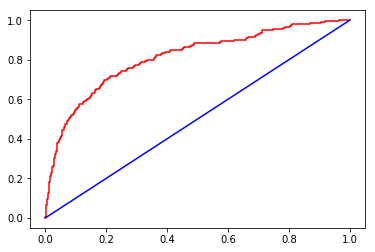

In [140]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)[:,1]
y_pred = lr.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

0.8107713484977939


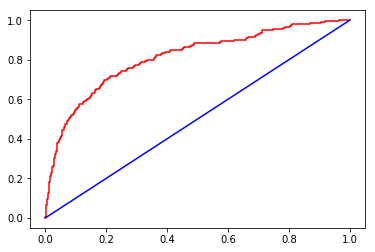

In [138]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)[:,1]
y_pred = lr.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [139]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34611
           1       0.00      0.00      0.00       196

    accuracy                           0.99     34807
   macro avg       0.50      0.50      0.50     34807
weighted avg       0.99      0.99      0.99     34807



# Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_prob = model_naive.predict_proba(X_test)[:,1]
y_pred = model_naive.predict(X_test) 
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))

0.8345725096254571


In [131]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84     34471
           1       0.76      0.62      0.68     20917

    accuracy                           0.78     55388
   macro avg       0.78      0.75      0.76     55388
weighted avg       0.78      0.78      0.78     55388



# Adaboost

0.9162533163828946


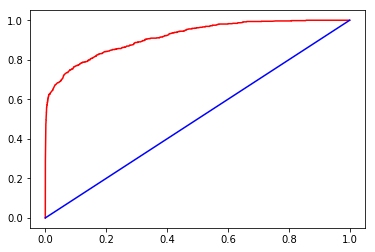

In [128]:
GS1= AdaBoostClassifier()
GS1.fit(X_train, y_train)
y_prob = GS1.predict_proba(X_test)[:,1]
y_pred = GS1.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [129]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     34471
           1       0.91      0.68      0.78     20917

    accuracy                           0.85     55388
   macro avg       0.87      0.82      0.84     55388
weighted avg       0.86      0.85      0.85     55388



# Gradient Boost

0.947413418456164


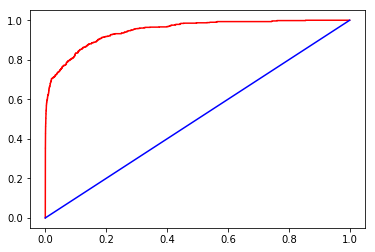

In [126]:
GS = GradientBoostingClassifier()
GS.fit(X_train, y_train)
y_prob = GS.predict_proba(X_test)[:,1]
y_pred = GS.predict(X_test)     
fpr, tpr, thresh = roc_curve(y_test, y_prob)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [127]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     34471
           1       0.93      0.72      0.81     20917

    accuracy                           0.87     55388
   macro avg       0.89      0.84      0.86     55388
weighted avg       0.88      0.87      0.87     55388



# Random Forest

0.9680149903962306


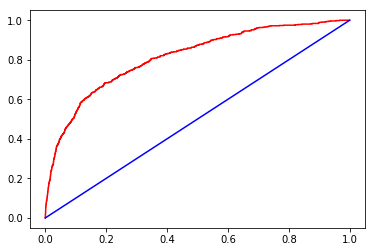

In [124]:
from sklearn.ensemble import RandomForestClassifier 

rf= RandomForestClassifier( max_depth=10, n_estimators=10)
rf.fit(X_train,y_train) 
y_prob = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)
print(roc_auc_score(y_test, y_prob))
plt.plot(fpr, tpr, color='r')
plt.plot(fpr, fpr, color='b')
plt.show()

In [125]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     34471
           1       0.97      0.75      0.84     20917

    accuracy                           0.90     55388
   macro avg       0.92      0.87      0.88     55388
weighted avg       0.90      0.90      0.89     55388

